# Demo Time Series Nuclear Power France

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
trainset=pd.read_csv('nuclear.csv', sep=';').drop(['Filière'],axis=1)
trainset['Date']=pd.to_datetime(trainset['Date'], )
trainset=trainset.set_index('Date')[:-1]
trainset

,Valeur (GW)
Date,
2019-01-01,49.71679
2019-01-02,53.30583
2019-01-03,53.51208
2019-01-04,53.57083
2019-01-05,53.64708
...,...
2024-03-16,43.27942
2024-03-17,43.16332
2024-03-18,42.62750


In [5]:
testset=trainset.iloc[-49:]
testset

,Valeur (GW)
Date,
2024-02-01,48.94804
2024-02-02,49.06049
2024-02-03,45.53645
2024-02-04,45.02441
2024-02-05,46.83975
2024-02-06,48.62854
2024-02-07,48.45267
2024-02-08,48.18729
2024-02-09,47.32187


In [6]:
trainset=trainset.iloc[:-49]
trainset

,Valeur (GW)
Date,
2019-01-01,49.71679
2019-01-02,53.30583
2019-01-03,53.51208
2019-01-04,53.57083
2019-01-05,53.64708
...,...
2024-01-27,49.21013
2024-01-28,48.67601
2024-01-29,48.15625


In [7]:
trainset_weekly=trainset.resample('W').mean()
trainset_monthly=trainset.resample('M').mean()

<Axes: title={'center': 'monthly'}, xlabel='Date'>

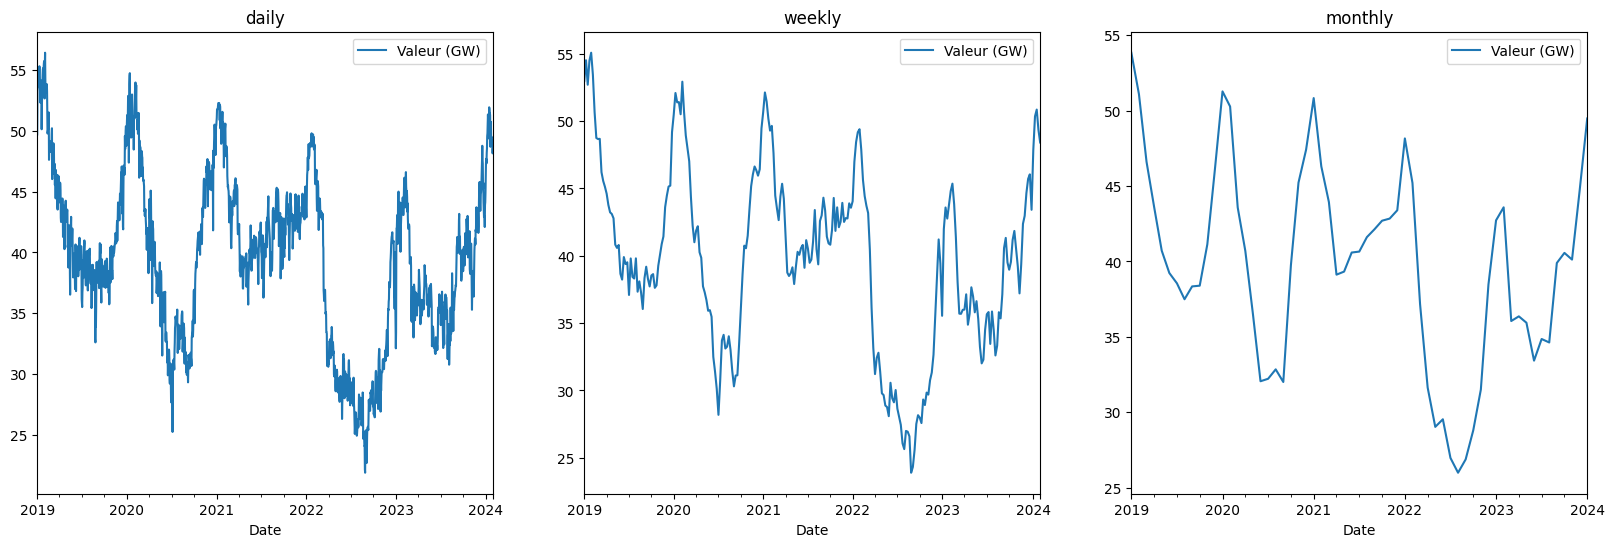

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
trainset.plot(ax=ax[0],title='daily')
trainset_weekly.plot(ax=ax[1],title='weekly')
trainset_monthly.plot(ax=ax[2],title='monthly')

In [9]:
trainset_monthly['nm_m']=trainset_monthly.index.map(lambda x: str(x).split('-')[1])
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
trainset_monthly['month']=trainset_monthly.nm_m.map(lambda x: months[int(x)-1])

In [10]:
trainset_monthly

,Valeur (GW),nm_m,month
Date,,,
2019-01-31,53.848688,01,jan
2019-02-28,51.101573,02,feb
2019-03-31,46.612673,03,mar
2019-04-30,43.615626,04,apr
2019-05-31,40.717661,05,may
...,...,...,...
2023-09-30,39.899779,09,sep
2023-10-31,40.569364,10,oct
2023-11-30,40.125158,11,nov


In [11]:
BBT=pd.DataFrame(index=range(5),columns=range(12))
for i in range(5):
    BBT.iloc[i,:]=trainset_monthly.iloc[12*i:12*(1+i),:].sort_values('Valeur (GW)')['month']
BBT

,0,1,2,3,4,5,6,7,8,9,10,11
0,aug,sep,oct,jul,jun,may,nov,apr,dec,mar,feb,jan
1,sep,jun,jul,aug,may,oct,apr,mar,nov,dec,feb,jan
2,apr,may,jun,jul,aug,sep,oct,nov,dec,mar,feb,jan
3,aug,sep,jul,oct,may,jun,nov,apr,mar,dec,feb,jan
4,jun,aug,jul,may,mar,apr,sep,nov,oct,jan,feb,dec


In [12]:
dfm=pd.DataFrame(index=range(5),columns=months)
for i in range(5):
    dfm.iloc[i,:]=trainset_monthly['Valeur (GW)'].iloc[12*i:12*(1+i)]
dfm

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,53.848688,51.101573,46.612673,43.615626,40.717661,39.235453,38.553,37.493725,38.345853,38.394366,41.136039,46.119145
1,51.282771,50.279523,43.582514,40.702478,36.525477,32.054161,32.218394,32.843318,32.005291,39.743933,45.230086,47.418025
2,50.838772,46.311754,43.942241,39.125058,39.328368,40.592681,40.656983,41.613998,42.135582,42.704698,42.84543,43.396724
3,48.162501,45.211925,37.168542,31.633723,29.027555,29.53208,26.966544,25.986167,26.870455,28.798535,31.503732,38.469574
4,42.727728,43.592692,36.05001,36.359539,35.936133,33.42154,34.857042,34.627095,39.899779,40.569364,40.125158,44.689206


In [13]:
season_correctedm=dfm.mean()-dfm.mean(axis=0).sum()/len(dfm.mean())
season_correctedm

jan    9.793114
feb    7.720515
mar    1.892218
apr   -1.291693
may   -3.271939
jun   -4.611795
jul   -4.928586
aug   -5.066118
sep   -3.727586
oct   -1.536799
nov    0.589111
dec    4.439557
dtype: object

In [14]:
trainset['no_seasonm']=trainset['Valeur (GW)']
for mon in season_correctedm.index:
    for year in range(5):
        trainset['no_seasonm'].loc[f'{2019+year}-{mon}']=trainset['no_seasonm'].loc[f'{2019+year}-{mon}']-season_correctedm[mon]
trainset

C:\Users\maxvi\AppData\Local\Temp\ipykernel_8344\1158041900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_seasonm']=trainset['Valeur (GW)']
C:\Users\maxvi\AppData\Local\Temp\ipykernel_8344\1158041900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_seasonm'].loc[f'{2019+year}-{mon}']=trainset['no_seasonm'].loc[f'{2019+year}-{mon}']-season_correctedm[mon]
C:\Users\maxvi\AppData\Local\Temp\ipykernel_8344\1158041900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,Valeur (GW),no_seasonm
Date,,
2019-01-01,49.71679,39.923676
2019-01-02,53.30583,43.512716
2019-01-03,53.51208,43.718966
2019-01-04,53.57083,43.777716
2019-01-05,53.64708,43.853966
...,...,...
2024-01-27,49.21013,49.210130
2024-01-28,48.67601,48.676010
2024-01-29,48.15625,48.156250


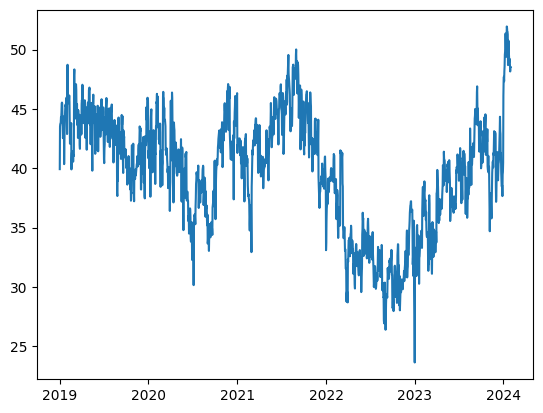

In [15]:
plt.plot(trainset.no_seasonm)

In [11]:
trainset_monthly['nm_q']=trainset_monthly.nm_m.map(lambda x: (int(x)-1)//3+1)
trainset_monthly

,Valeur (GW),nm_m,month,nm_q
Date,,,,
2019-01-31,53.848688,01,jan,1
2019-02-28,51.101573,02,feb,1
2019-03-31,46.612673,03,mar,1
2019-04-30,43.615626,04,apr,2
2019-05-31,40.717661,05,may,2
...,...,...,...,...
2023-09-30,39.899779,09,sep,3
2023-10-31,40.569364,10,oct,4
2023-11-30,40.125158,11,nov,4


In [30]:
trainset_quarterly = trainset.resample('Q').mean()
trainset_quarterly['nm_q']=trainset_monthly.nm_q
trainset_quarterly

,Valeur (GW),no_season,nm_q
Date,,,
2019-03-31,50.501625,88.578155,1.0
2019-06-30,41.184394,-4.428458,2.0
2019-09-30,38.128522,38.128522,3.0
2019-12-31,41.891305,41.891305,4.0
2020-03-31,48.339890,89.156388,1.0
2020-06-30,36.428450,-9.184401,2.0
2020-09-30,32.359476,32.359476,3.0
2020-12-31,44.118731,44.118731,4.0
2021-03-31,47.054895,85.131425,1.0


In [31]:
BBTq=pd.DataFrame(index=range(5),columns=range(5)[1:])
for i in range(5):
    BBTq.iloc[i,:]=trainset_quarterly.iloc[4*i:4*(1+i),:].sort_values('Valeur (GW)')['nm_q']
BBTq

,1,2,3,4
0,3.0,2.0,4.0,1.0
1,3.0,2.0,4.0,1.0
2,2.0,3.0,4.0,1.0
3,3.0,2.0,4.0,1.0
4,2.0,3.0,1.0,4.0


In [32]:
df=pd.DataFrame(index=range(5),columns=range(5)[1:])
for i in range(5):
    df.iloc[i,:]=trainset_quarterly['Valeur (GW)'].iloc[4*i:4*(1+i)]
df

,1,2,3,4
0,50.501625,41.184394,38.128522,41.891305
1,48.33989,36.42845,32.359476,44.118731
2,47.054895,39.67815,41.461607,42.983771
3,43.457736,30.053058,26.604866,32.939384
4,40.696725,35.246731,36.42393,41.812722


In [33]:
season_corrected=df.mean()-df.mean(axis=0).sum()/len(df.mean())
season_corrected

1    6.441876
2   -3.050142
3   -4.572618
4    1.180884
dtype: float64

In [34]:
season_corrected.sum()

0.0

In [35]:
trainset['no_season']=trainset['Valeur (GW)']
for quarter in season_corrected.index:
    for year in range(4):
        trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]
trainset

C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season']=trainset['Valeur (GW)']
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]


,Valeur (GW),no_season
Date,,
2019-01-01,49.71679,43.274914
2019-01-02,53.30583,46.863954
2019-01-03,53.51208,47.070204
2019-01-04,53.57083,47.128954
2019-01-05,53.64708,47.205204
...,...,...
2024-01-27,49.21013,49.210130
2024-01-28,48.67601,48.676010
2024-01-29,48.15625,48.156250


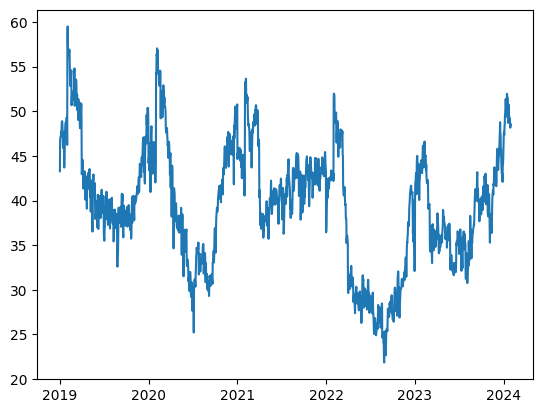

In [36]:
plt.plot(trainset.no_season)

In [22]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()
modeleReg.fit(np.array(range(len(trainset))).reshape(-1,1),trainset.no_seasonm)

LinearRegression()

In [18]:
coef=modeleReg.coef_
intercept=modeleReg.intercept_
coef, intercept

(array([-0.00341456]), 42.91467924626927)

In [19]:
trend=coef*np.array(range(len(trainset))).reshape(-1,1)+intercept
trend=np.hstack(trend)
trend

array([42.91467925, 42.91126469, 42.90785013, ..., 36.58409015,
       36.58067559, 36.57726104])

In [20]:
trainset['residual']=trainset.no_seasonm-trend
trainset

C:\Users\maxvi\AppData\Local\Temp\ipykernel_8344\2364312295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['residual']=trainset.no_seasonm-trend


,Valeur (GW),no_seasonm,residual
Date,,,
2019-01-01,49.71679,39.923676,-2.991003
2019-01-02,53.30583,43.512716,0.601451
2019-01-03,53.51208,43.718966,0.811116
2019-01-04,53.57083,43.777716,0.873280
2019-01-05,53.64708,43.853966,0.952945
...,...,...,...
2024-01-27,49.21013,49.210130,12.619211
2024-01-28,48.67601,48.676010,12.088505
2024-01-29,48.15625,48.156250,11.572160


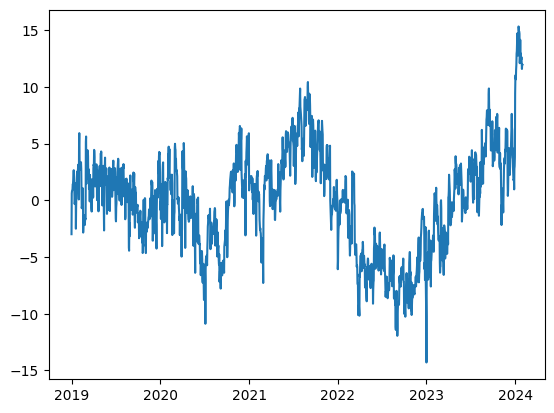

In [21]:
plt.plot(trainset.residual)

In [51]:
trainset.residual.describe()

count    1.857000e+03
mean     3.244697e-15
std      4.503632e+00
min     -1.429683e+01
25%     -3.040663e+00
50%      2.332599e-01
75%      2.812643e+00
max      1.531603e+01
Name: residual, dtype: float64

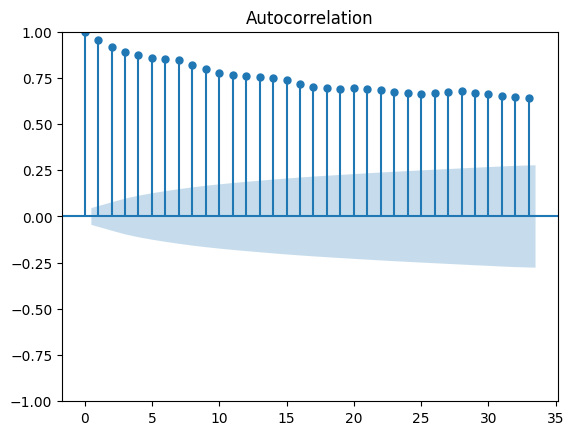

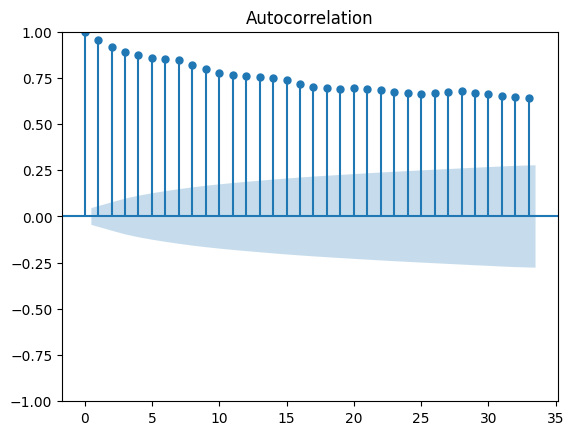

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(trainset.residual)

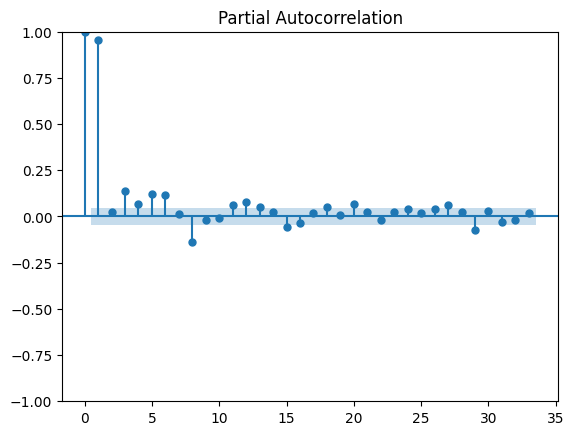

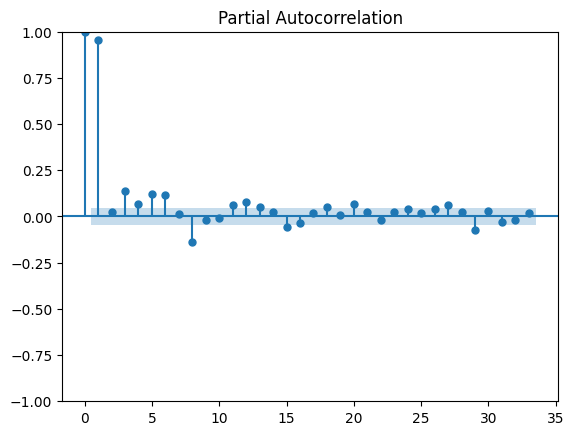

In [54]:
plot_pacf(trainset.residual)

In [55]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(trainset.residual, order=(2,1,7))
res=model.fit()
res.summary()

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               residual   No. Observations:                 1857
Model:                 ARIMA(2, 1, 7)   Log Likelihood               -3002.066
Date:                Tue, 23 Apr 2024   AIC                           6024.133
Time:                        13:51:07   BIC                           6079.395
Sample:                    01-01-2019   HQIC                          6044.501
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2428      0.003    442.408      0.000       1.237       1.248
ar.L2         -0.9952      0.003   -373.733      0.000      -1.000      -0.990
ma.L1         -1.3770      0.020    -69.560      0.000      -1.416      -1.338
ma.L2          0.9903      0.036     27.631      0.000       0.920       1.061
ma.L3          0.0524      0.042      1.236      0.216      -0.031       0.136
ma.L4         -0.1997      0.044     -4.519      0.000      -0.286      -0.113
ma.L5         -0.0102      0.046     -0.221      0.825      -0.101       0.080
ma.L6          0.0222      0.039      0.571      0.568      -0.054       0.099
ma.L7         -0.0566      0.022     -2.535      0.011      -0.100      -0.013
sigma2         1.4809      0.031     47.755      0.000       1.420       1.542
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1025.49
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(trainset.residual, order=(1,1,6))
model = arima_model.fit()
#print(model.summary())
testset['residual_pred'] = model.forecast(len(testset))
testset

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\3634655582.py:5: SettingWithCopyWarning: 
A value

,Valeur (GW),residual_pred
Date,,
2024-02-01,48.94804,12.038323
2024-02-02,49.06049,12.165272
2024-02-03,45.53645,12.175708
2024-02-04,45.02441,12.146854
2024-02-05,46.83975,12.151345
2024-02-06,48.62854,12.144888
2024-02-07,48.45267,12.142644
2024-02-08,48.18729,12.141864
2024-02-09,47.32187,12.141593


In [61]:
testset['residual_pred'].describe()

count    49.000000
mean     12.140949
std       0.016140
min      12.038323
25%      12.141449
50%      12.141449
75%      12.141449
max      12.175708
Name: residual_pred, dtype: float64

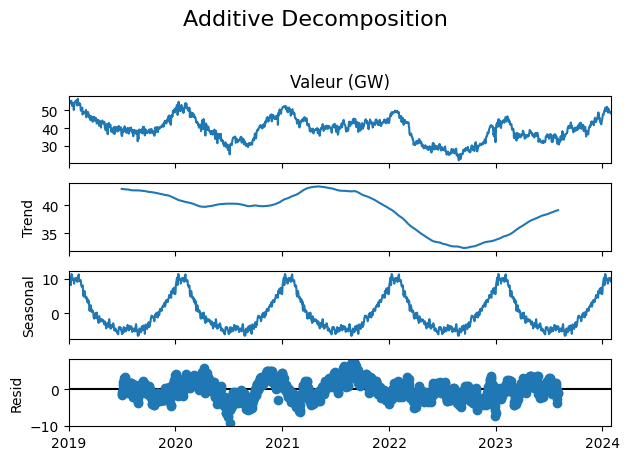

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(trainset['Valeur (GW)'], model="additive",period=365)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()